#### GBM image post-processing
##### 1st May 2023
##### 2nd May ; plots as subplots (red dots), create typing class, 
##### 3rd May : updated both the typing classes, generated one set of figures for 1st image
##### 8th May : cleaned the plots
##### 19th May: Re-arraged cells, re-coded amp_code and cell_type_code, changed color scheme, added mutation_status_code group, edited size of dots
##### 21st May: y-axis inversion of plots to match image coordinates.
##### 10th June: loop across all images
##### 11th June: single-view clustering and compacting
##### 12th June: Github upload
##### 10th Sep/26th October: FoV recluster based on patient and response id 

In [1]:
### added phenograph install
!pip install PhenoGraph 
import numpy as np
import pandas as pd
import scipy.integrate
import math
import matplotlib.pyplot as plt
import seaborn as sns
import phenograph
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import time
import multiprocessing as mp
import os

from scipy.stats import zscore

#from sklearn.manifold import TSNE
#from sklearn.mixture import BayesianGaussianMixture
from openTSNE import TSNE



import phenograph as pg
import random

from matplotlib.lines import Line2D


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.colors as mcolors

mcolors.BASE_COLORS #these colors can be called with a single character

mcolors.TABLEAU_COLORS #the default color cycle colors

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [3]:
'''
find . | grep .git | xargs rm -rf
find . -name ".DS_Store" -delete
'''

'\nfind . | grep .git | xargs rm -rf\nfind . -name ".DS_Store" -delete\n'

In [4]:
colours_30 = ["gainsboro", "crimson","gold", "dodgerblue","darkorange","darkviolet","seagreen","lightpink"]
colours_31 = ["whitesmoke","silver", "orange","chocolate", "yellowgreen","forestgreen","darkkhaki","darkolivegreen",
            "pink","hotpink"]
colours_32 = ["gainsboro", "maroon"]
colours_33 = ["cadetblue","saddlebrown","slategrey","powderblue",
            "palevioletred","mediumvioletred","yellowgreen","lemonchiffon","chocolate",
              "lightsalmon","lightcyan","lightblue", "darkorange","magenta","sienna","midnightblue","tomato","tomato","aqua",
             "darkslategray","coral","lightcoral","sandybrown","indianred","olivedrab","darkgreen","blueviolet","forestgreen","darkred",
             "dimgray","teal","mistyrose"]

In [173]:
##necessary paths
data_path = '/Users/4470526/Downloads/Projects/GBM_SCRIPPS/ImageAnalysis_Moffitt_Complete/'
loc='all_count_matrices/'
data_path_output = '/Users/4470526/Downloads/Projects/GBM_SCRIPPS/ImageAnalysis_Moffitt_Complete/output/'


In [175]:
#data_path = 'C:\\Users\\ugoma\\Dropbox (Scripps Research)\\Janiszewska Lab\\Ugoma_JaniszewskaLab\\Projects\\ImageAnalysis_Moffitt_Complete\\'
#name = 'CM_Case05RecuA2_Broad'
#count_matrix =  np.array(pd.read_csv(os.path.join(data_path+name+'.csv'), header=0,index_col=None)) 

In [176]:
### Genotyping classification: Changed to specifically categorize, single, double and triple amplifiation including equivocal. 
### Removed Equivocal class
### Ordered heirarchacally to avoid overlap with elif looping

amp_code = -1
def genotyping(r1):
    ##genotype wt and mut combined
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :
        amp_code = 0 #no amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :
        amp_code = 0 #no amp C228T mut     
    
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :
        amp_code = 1 #pdgfra amp C228T wt    
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :
        amp_code = 1 #pdgfra amp C228T mut
              
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 2 #egfr amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 2 #egfr amp C228T mut       
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 3 #cdk4 amp C228T wt  
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 3 #cdk4 amp C228T mut
        
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 4 #egfr + pdgfra amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 4 #egfr + pdgfra amp C228T mut
        
    
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 5 #cdk4 + pdgfra amp C228T wt
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 5 #cdk4 + pdgfra amp C228T mut

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 6 #cdk4 + egfr amp C228T wt
    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 6 #cdk4 + egfr amp C228T mut

    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)) and (count_matrix[r1,6] ==0)) :
        amp_code = 7 #all amp C228T wt      
    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)and (count_matrix[r1,6] >=1))) :
        amp_code = 7 #all amp C228T mut
        
    return(amp_code)

geno_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']

In [177]:
'''
### Function to identify amplified cells WITH mutations

amp_code2 = -4
def genotyping2(r1):
    ##genotype mut
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :
        amp_code2 = 0 #no amp C228T mut
      
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :
        amp_code2 = 1 #pdgfra amp C228T mut  
                 
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 2 #egfr amp C228T mut
   
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 3 #cdk4 amp C228T mut  
         
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 4 #egfr + pdgfra amp C228T mut
     
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 5 #cdk4 + pdgfra amp C228T mut

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 6 #cdk4 + egfr amp C228T mut

    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)and (count_matrix[r1,6] >=1))) :
        amp_code2 = 7 #all amp C228T mut
    
    return(amp_code2)

geno2_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']'''

"\n### Function to identify amplified cells WITH mutations\n\namp_code2 = -4\ndef genotyping2(r1):\n    ##genotype mut\n          \n    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) \n        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :\n        amp_code2 = 0 #no amp C228T mut\n      \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and \n          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :\n        amp_code2 = 1 #pdgfra amp C228T mut  \n                 \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and \n          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):\n        amp_code2 = 2 #egfr amp C228T mut\n   \n   \n    elif (((count_matrix

In [178]:
'''
### function to identify amplified cells WITHOUT TERT C228T mutations


amp_code2 = -4
def genotyping2(r1):
    ##genotype wt
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :
        amp_code2 = 0 #no amp C228T wt
          
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :
        amp_code2 = 1 #pdgfra amp C228T wt    
              
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 2 #egfr amp C228T wt
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 3 #cdk4 amp C228T wt 
            
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 4 #egfr + pdgfra amp C228T wt
        
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 5 #cdk4 + pdgfra amp C228T wt

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 6 #cdk4 + egfr amp C228T wt
 
    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)) and (count_matrix[r1,6] ==0)) :
        amp_code2 = 7 #all amp wt
        
    return(amp_code2)

geno2_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']'''


"\n### function to identify amplified cells WITHOUT TERT C228T mutations\n\n\namp_code2 = -4\ndef genotyping2(r1):\n    ##genotype wt\n          \n    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) \n        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :\n        amp_code2 = 0 #no amp C228T wt\n          \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and \n          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :\n        amp_code2 = 1 #pdgfra amp C228T wt    \n              \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and \n          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):\n        amp_code2 = 2 #egfr amp C228T wt\n   \n    elif (((co

In [179]:
### function to identify different cell types in the microenvironment
# phenotyping

cell_type_code = -2
def phenotyping(r1, amp_code):
    ##Unclassified TME
    if ((amp_code ==0) and (count_matrix[r1,6]==0) and
        (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 0 # unclassified TME cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 1 # unclassified TME cell, hypoxic
    
    ##Immune Cell Definitions      
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 2 # immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 2 # immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 3 # hypoxic immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 3 # hypoxic immune cell
    
    ##Endothelial Cell Definitions
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 4 # endothelial cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 5 # hypoxic endothelial cell
    
    ##Tumor Cell Definitions
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # TERT mutant GBM cell, EC mimicry
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # GBM cell, C228T wt, EC mimicry
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # Hypoxic TERT mutant GBM cell, EC mimicry
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # Hypoxic GBM cell, C228T wt, EC mimicry
    
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # GBM cell, TERT mutant
    elif (amp_code >0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # GBM cell, C228T wt
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # Hypoxic GBM cell,TERT mutant 
    elif (amp_code >0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # Hypoxic GBM cell, C228T wt    

    ## previously NA label re-catagorized based on dominating phenotype 
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # NA (GBM cell, TERT mutant, EC mimicry)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # NA (Hypoxic GBM cell, TERT mutant, EC mimicry)
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, C228T wt)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, TERT mutant)    
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, C228T wt)
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell, C228T wt)   
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell, C228T wt)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell,TERT mutant)

    return(cell_type_code)


pheno_labels = ['Unclassified TME','Hypoxic Unclassified TME','Immune','Hypoxic Immune','Endothelial','Hypoxic Endothelial',
                  'EC Mimicry Tumor Cell','Hypoxic EC Mimicry Tumor Cell', 'Tumor Cell',
                  'Hypoxic Tumor Cell']

In [180]:
### function to differentiate TERT mutation positive from TERT mutation negative cells
# mutation status
mutation_status_code = -3
def mutation(r1):
    if ((count_matrix[r1,6]>0)):
        mutation_status_code = 1 # TERT mutant GBM cell
      
    else:
        mutation_status_code = 0 # C228T wt, GBM
      
    return(mutation_status_code)
mut_labels = ['TERT C228T wt','TERT C228T mut']
    

In [181]:


colors = colours_30[0:9]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = geno_labels

colors_p = colours_31[0:18]
lines_p = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_p]
labels_p = pheno_labels

colors_m = colours_32[0:9]
lines_m = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_m]
labels_m = mut_labels

In [ ]:
### code to extract primary/recurrance and patient id from file name
# recu = 1, prim = 0
# folded into main segment
'''
response_list = []
pat_list = []

for i in range(len(fname_list)):
    fn = fname_list[i]
    s1=fn.split('_')[1].split('Case')[1]
    print(s1)

    
    if (s1.find('Recu')>0):
        response_list.append(1)
        s2=s1.split('Recu')[0]
        
    elif (s1.find('Prim')>0):
        response_list.append(0)
        s2=s1.split('Prim')[0]
    pat_list.append(s2)

'''

In [ ]:
### code to loop over each count matrix

m_table = []
gn_list = []
pn_list = []
mn_list = []

count = 0
fname_list = [] #list of file names in the order they are read
image_id_list = [] #integer mapping of file names 

response_list = []
pat_list = []

response_id_list = []
pat_id_list = []
    
for fname in os.listdir(data_path+loc):  
    print('reading file '+ str(count))
    print(fname)
    fname_list.append(fname)
    
    s1=fname.split('_')[1].split('Case')[1]
    print(s1)

    
    if (s1.find('Recu')>0):
        response_list.append(1)
        s2=s1.split('Recu')[0]
        
    elif (s1.find('Prim')>0):
        response_list.append(0)
        s2=s1.split('Prim')[0]
    
    pat_list.append(s2)
    
    
    count_matrix =  np.array(pd.read_csv(os.path.join(data_path + loc+fname), header=0,index_col=None)) 
    
    print (count_matrix.shape)
    
    ## replace nan with 0
    count_matrix[np.isnan(count_matrix)] = 0
    
    im_num, count_im_num = np.unique(count_matrix[:,0],return_counts=True)
    
    
    
    ## collect the lists per CM
    geno_list = []
    pheno_list = []
    mut_list = []

    for r1 in range(count_matrix.shape[0]):
        #print('row',r1)    
        ac = genotyping(r1) #genotyping function returns the amp_code value (ac = amp_code)
        #print("ac=",ac)
        geno_list.append(ac)  #an array of the amp_code value for each row of the data table
            
        ct = phenotyping(r1,ac) 
        #print("ct=",ct)
        pheno_list.append(ct) #an array of the cell_type_code for each row and a given amp_code
        
        mt = mutation(r1) 
        #print("mt=",mt)
        mut_list.append(mt) #an array of the mutation_status_code for each row
        
      
    ##Added a scatter plot and a bar plot to show spatial distriubution of TERT C228T positive nuclei
    ##Added the line plt.gca().invert_yaxis() to invert why axis count which mirrors orientation of fluorescent images


    ## merge geno and phenotypes 




    #im1 = [1]



    ## for each FoV in that count matrix
    for im in im_num:
        image_id_list.append(im) # to collect image id
        pat_id_list.append(pat_list[count])
        response_id_list.append(response_list[count])
        
        m_table.append([fname,im])
        
        print('image '+str(im))
        ii = np.int64(im)

        fig = plt.figure(figsize=(15,10),dpi=500)
        plt.title(fname+'_'+str(ii))

        s1 = np.where(np.array(count_matrix[:,0])==im)


        #####
        #####
        plt.subplot(2,3,2)
        geno_colr = np.array(geno_list)[s1]
        #color_s1 = colours_30
        area = np.round(np.sqrt(count_matrix[ s1, 2]/np.pi),0)*4
        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors)[geno_colr],
                    s=50,linewidths=0,alpha=0.8)#, label= labels[s1])
        plt.gca().invert_yaxis()
        plt.axis('on')
        #plt.legend()
        colors = colours_30[0:9]
        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
        labels = geno_labels
        plt.legend(lines, labels,fontsize='x-small',loc='center right', bbox_to_anchor=(2.8,-0.3))
        plt.title('Genotype diversity')
        
        #####
        #####
        plt.subplot(2,3,5)
        n , c= np.unique(geno_colr,return_counts=True)
        gn = np.zeros(len(geno_labels))
        for i,j in enumerate(n):
            #print(j)
            gn[j]=np.int64(c[i])
        gn = np.array(gn)
        #print(gn) 
        X_axis = np.arange(len(geno_labels))
        X=y_marker = geno_labels
        plt.bar(X_axis, gn, 0.3, label = y_marker,color=colors)
        plt.xticks(X_axis, X,rotation=90,fontsize='small')
        plt.xlabel("Genotypes")
        plt.ylabel("Distribution (# of cells)")
        plt.title("Cell distribution in each genotype")

        
        #####
        #####
        plt.subplot(2,3,1)
        pheno_colr = np.array(pheno_list)[s1]
        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors_p)[pheno_colr],
                    s=50,linewidths=0,alpha=0.8)# ,label= np.array(colours_30)[pheno_colr] )
        plt.gca().invert_yaxis()
        plt.axis('on')
        plt.title('Phenotypic diversity')
        colors_p = colours_31[0:18]
        lines_p = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_p]
        labels_p = pheno_labels
        plt.legend(lines_p, labels_p,fontsize='x-small',loc='upper left', bbox_to_anchor=(3.45, 0.7))

        #####
        #####        
        plt.subplot(2,3,4)
        n , c= np.unique(pheno_colr,return_counts=True)
        pn = np.zeros(len(pheno_labels))
        for i,j in enumerate(n):
            #print(j)
            pn[j]=np.int64(c[i])
        pn = np.array(pn)
        X_axis = np.arange(len(pheno_labels))
        X=y_marker = pheno_labels
        plt.bar(X_axis, pn, 0.3, label = y_marker,color=colors_p)
        plt.xticks(X_axis, X,rotation=90,fontsize='small')
        plt.xlabel("Phenotypes")
        plt.ylabel("Distribution (# of cells)")
        plt.title("Cell distribution in each phenotype")

        #####
        #####        
        plt.subplot(2,3,3)
        mut_colr = np.array(mut_list)[s1]
        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors_m)[mut_colr],
                    s=50,linewidths=0,alpha=0.8)# ,label= np.array(colours_30)[pheno_colr] )
        plt.gca().invert_yaxis()
        plt.axis('on')
        plt.title('TERT C228T Distribution')
        colors_m = colours_32[0:9]
        lines_m = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_m]
        labels_m = mut_labels
        plt.legend(lines_m, labels_m,fontsize='x-small',loc='center right', bbox_to_anchor=(1.415,-0.8))
       
        
        #####
        #####
        plt.subplot(2,3,6)
        n , c= np.unique(mut_colr,return_counts=True)
        mn = np.zeros(len(mut_labels))
        for i,j in enumerate(n):
            #print(j)
            mn[j]=np.int64(c[i])
        mn = np.array(mn)  
        X_axis = np.arange(len(mut_labels))
        X=y_marker = mut_labels
        plt.bar(X_axis, mn, 0.3, label = y_marker,color=colors_m)
        plt.xticks(X_axis, X,rotation=90,fontsize='small')
        plt.xlabel("Mutation Status")
        plt.ylabel("Distribution (# of cells)")
        plt.title("Cell distribution in each status")

        mn_list.append(mn)
        pn_list.append(pn)
        gn_list.append(gn)
        #plt.savefig(data_path_output+'figures/'+fname+'_'+str(ii)+'_fig'+'.png',bbox_inches='tight')


    count = count + 1
        

In [196]:
count

18

In [197]:
print(response_list)
print(pat_list)

print(response_id_list)
print(pat_id_list)

[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
['07', '05', '08', '08', '06', '09', '04', '01', '07', '03', '09', '05', '03', '06', '04', '01', '02', '02']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
['07', '07', '07', '07', '07', '05', '05', '05', '05', '05', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '06', '06', '06', '06', '06', '09', '09', '09', '09', '09', '04', '04', '04', '04', '04', '01', '01', '01', '01', '01', '07', '07', '07', '07', '07', '03', '03', '03', '03', '03', '09', '09', '09', '09', '09', '05', '05', '05', '05', '05', '03', '03', '03', '03', '03', '06', '06', '06', '06', '06', '04', '04', '04', '04', '04', '01', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02']


In [199]:
### save the matrices
df_data = pd.DataFrame(np.array(gn_list))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'geno_list.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(mn_list))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'muta_list.csv'), header=None, index=None)


df_data = pd.DataFrame(np.array(pn_list))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'pheno_list.csv'), header=None, index=None)


df_data = pd.DataFrame(np.array(image_id_list))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'image_id_list.csv'), header=None, index=None)


df_data = pd.DataFrame(np.array(fname_list))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'file_names_list.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(m_table))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'mtable_file_names_list.csv'), header=None, index=None)


In [200]:
fname_list

['CM_Case07RecuA1_Broad.csv',
 'CM_Case05RecuA2_Broad.csv',
 'CM_Case08PrimB2_Broad.csv',
 'CM_Case08RecuC1_Broad.csv',
 'CM_Case06PrimA1_Broad.csv',
 'CM_Case09PrimA1_Broad.csv',
 'CM_Case04PrimB1_Broad.csv',
 'CM_Case01PrimA1_Broad.csv',
 'CM_Case07PrimA5_Broad.csv',
 'CM_Case03RecuA1_Broad.csv',
 'CM_Case09RecuA4_Broad.csv',
 'CM_Case05PrimB3_Broad.csv',
 'CM_Case03PrimB2_Broad.csv',
 'CM_Case06RecuB1_Broad.csv',
 'CM_Case04RecuB2_Broad.csv',
 'CM_Case01RecuB1_Broad.csv',
 'CM_Case02PrimB3_Broad.csv',
 'CM_Case02RecuA1_Broad.csv']

In [201]:
len(image_id_list)

90

In [202]:
len(gn_list)

90

#### section 2: clustering (11th June 2023), Cluster using Phenograph/Leiden algorithm

In [203]:
### read the matrices

gn_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'geno_list.csv'), index_col=None, header= None)
print(gn_data.shape)
gn_data = np.array(gn_data)
                   
pn_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'pheno_list.csv'), index_col=None, header= None)
print(pn_data.shape)
pn_data = np.array(pn_data)
                   
                   
mn_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'muta_list.csv'), index_col=None, header= None)
print(mn_data.shape)
mn_data = np.array(mn_data)

file_name_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'file_names_list.csv'), index_col=None, header= None)
print(file_name_data.shape)
file_name_data = np.array(file_name_data)

image_ids = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'image_id_list.csv'), index_col=None, header= None)
print(image_ids.shape)
image_ids = np.array(image_ids).flatten()

(90, 8)
(90, 10)
(90, 2)
(18, 1)
(90, 1)


##### geno clusters

In [204]:
'''
pip install scipy==1.4.1 --use-feature=2020-resolver
pip install Phenograph==1.5.7
pip install bhtsne
'''

'\npip install scipy==1.4.1 --use-feature=2020-resolver\npip install Phenograph==1.5.7\npip install bhtsne\n'

In [242]:
communities, graph, Q = pg.cluster(gn_data)#, min_cluster_size=1)#,k=500)
cluster_asgn_gn = communities

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.10935616493225098 seconds
Jaccard graph constructed in 0.0943307876586914 seconds
Wrote graph to binary file in 0.006226062774658203 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.497131
Louvain completed 21 runs in 0.45823192596435547 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.905052900314331 seconds


In [243]:
M = gn_data 

num_cells = M.shape[0]
num_genes = M.shape[1]

In [244]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
X_2d_gn = TSNE(perplexity=10).fit(M)


unique [0 1 2]


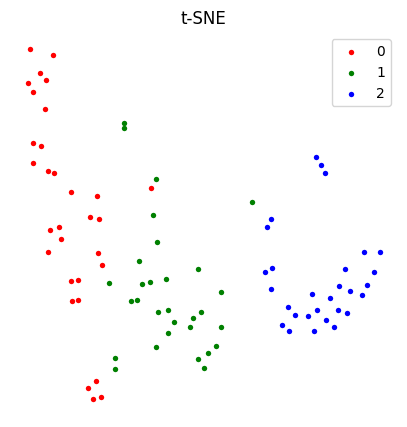

In [245]:
unique, counts = np.unique(cluster_asgn_gn, return_counts=True)
print('unique',str(unique))
colo_geno=['red','green','blue','yellow','pink','orange']
#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(5,5),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_geno[i] #cm.colors[i]
    plt.scatter(X_2d_gn[ cluster_asgn_gn==(i), 0], X_2d_gn[ cluster_asgn_gn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title('t-SNE')
#plt.show()
file_name = os.path.join(data_path_output + '/figures/'+'cluster_geno.png')
plt.savefig(file_name,dpi=150)

In [246]:
scaled_X = zscore(gn_data,axis=1)
y_marker = geno_labels

Genotype label spread


<Figure size 400x400 with 0 Axes>

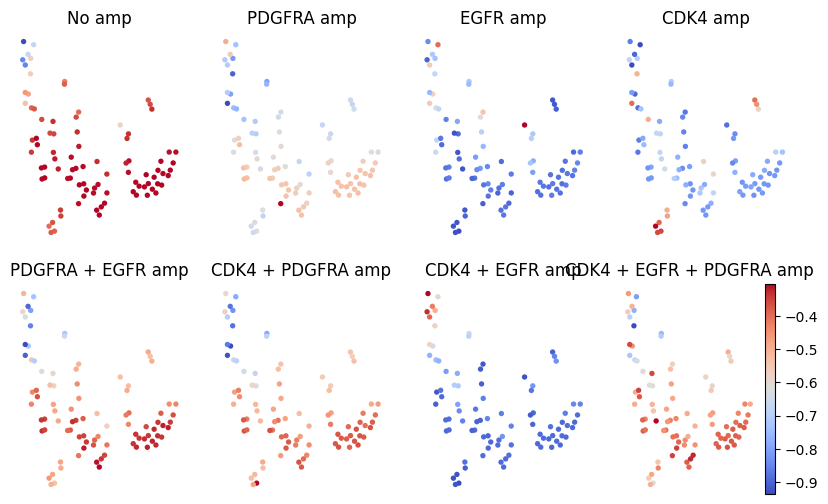

In [247]:


#tsne coloured based on genotype label spread


#t-SNE plots
print('Genotype label spread')
plt.figure(100, figsize=(4,4),dpi=100)
#plt.axis('off')

cols = np.int64(len(geno_labels)/2)

fig = plt.figure()

for m in range(len(geno_labels)):
    
    ax1 = fig.add_subplot(2,cols,m+1)
    plt.scatter(X_2d_gn[:,0], X_2d_gn[:,1], c=scaled_X[:,m],   s=15,linewidths=0, cmap='coolwarm')
    plt.axis('off')
    plt.title(y_marker[m])
plt.colorbar()

file_name = os.path.join(data_path_output + '/figures/'+'geno_label_distribution.png')
plt.savefig(file_name,dpi=150)



In [248]:
df_data = pd.DataFrame(np.array(X_2d_gn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'X2d_geno.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_gn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'cluster_asgn_geno.csv'), header=None, index=None)


##### pheno clusters


In [226]:
communities, graph, Q = pg.cluster(pn_data)#, min_cluster_size=1)#,k=500)
cluster_asgn_pn = communities

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11080694198608398 seconds
Jaccard graph constructed in 0.08809399604797363 seconds
Wrote graph to binary file in 0.006169795989990234 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.424344
After 11 runs, maximum modularity is Q = 0.42566
Louvain completed 31 runs in 0.8638789653778076 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1.2985210418701172 seconds


In [227]:
M = pn_data

num_cells = M.shape[0]
num_genes = M.shape[1]



In [236]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
X_2d_pn = TSNE(perplexity=10).fit(M)


unique [0 1 2]


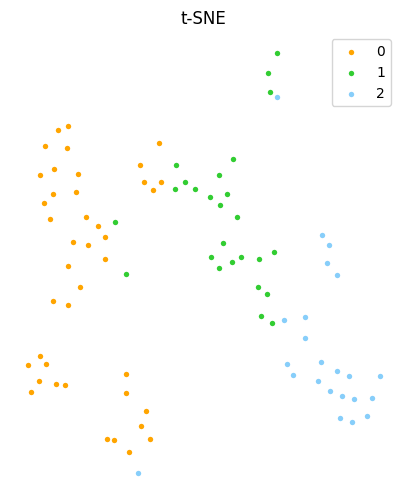

In [237]:
unique, counts = np.unique(cluster_asgn_pn, return_counts=True)
print('unique',str(unique))
colo_pheno=['orange','limegreen','lightskyblue','violet','gray','red']
#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_pheno[i] #cm.colors[i]
    plt.scatter(X_2d_pn[ cluster_asgn_pn==(i), 0], X_2d_pn[ cluster_asgn_pn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title('t-SNE')
#plt.show()
file_name = os.path.join(data_path_output + '/figures/'+'cluster_pheno.png')
plt.savefig(file_name,dpi=150)

In [238]:
scaled_X = zscore(pn_data,axis=1)
y_marker = pheno_labels

In [239]:
pheno_labels

['Unclassified TME',
 'Hypoxic Unclassified TME',
 'Immune',
 'Hypoxic Immune',
 'Endothelial',
 'Hypoxic Endothelial',
 'EC Mimicry Tumor Cell',
 'Hypoxic EC Mimicry Tumor Cell',
 'Tumor Cell',
 'Hypoxic Tumor Cell']

Phenotype label spread


<Figure size 2250x2250 with 0 Axes>

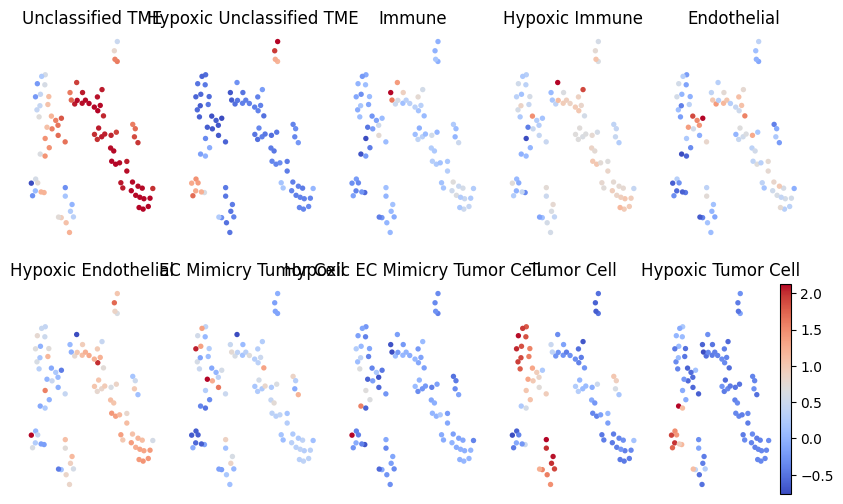

In [240]:
 
#tsne coloured based on phenotype label spread





#t-SNE plots
print('Phenotype label spread')
plt.figure(100, figsize=(5,5),dpi=450)
#plt.axis('off')

cols = np.int64(len(pheno_labels)/2)

fig = plt.figure()



for m in range(len(pheno_labels)):
    
    ax1 = fig.add_subplot(2,cols,m+1)
    plt.scatter(X_2d_pn[:,0], X_2d_pn[:,1], c=scaled_X[:,m],   s=15,linewidths=0, cmap='coolwarm')
    plt.axis('off')
    plt.title(y_marker[m])
plt.colorbar()

file_name = os.path.join(data_path_output + '/figures/'+'pheno_label_distribution.png')
plt.savefig(file_name,dpi=150)



In [241]:
df_data = pd.DataFrame(np.array(X_2d_pn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'X2d_pheno.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_pn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'cluster_asgn_pheno.csv'), header=None, index=None)


##### mutation clusters

In [279]:
communities, graph, Q = pg.cluster(mn_data)#, min_cluster_size=1)#,k=500)
cluster_asgn_mn = communities

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1087799072265625 seconds
Jaccard graph constructed in 0.09839415550231934 seconds
Wrote graph to binary file in 0.006249904632568359 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.532957
Louvain completed 21 runs in 0.4912550449371338 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.951077938079834 seconds


In [280]:
M = mn_data 

num_cells = M.shape[0]
num_genes = M.shape[1]



In [281]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
X_2d_mn = TSNE(perplexity=10).fit(M)


unique [0 1 2]


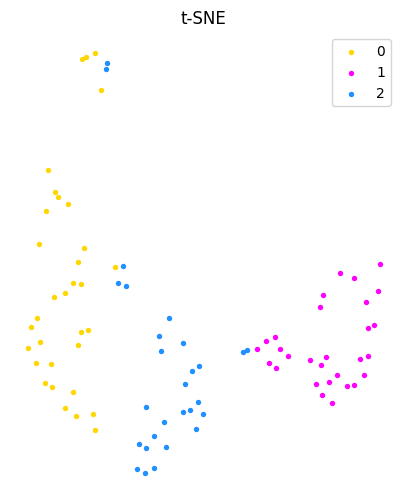

In [282]:
unique, counts = np.unique(cluster_asgn_mn, return_counts=True)
print('unique',str(unique))
colo_muta=['gold','magenta','dodgerblue','green']
#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_muta[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_mn==(i), 0], X_2d_mn[ cluster_asgn_mn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title('t-SNE')
#plt.show()
file_name = os.path.join(data_path_output + '/figures/'+'cluster_muta.png')
#plt.savefig(file_name,dpi=150)

In [253]:
scaled_X = zscore(mn_data,axis=1)
y_marker = mut_labels

Mutation label spread


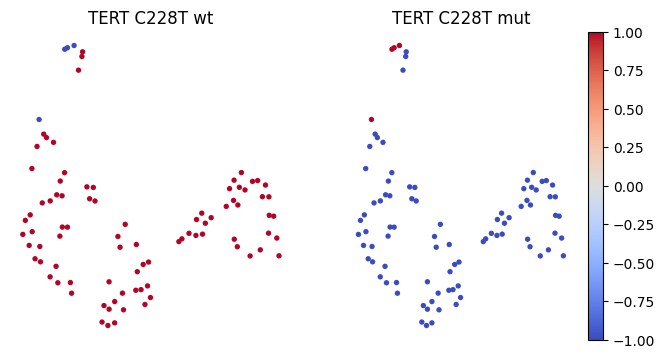

In [254]:


#t-SNE plots
print('Mutation label spread')
#plt.figure(100, figsize=(4,4),dpi=dpi_set)
#plt.axis('off')

cols = np.int64(len(mut_labels))

fig = plt.figure(figsize=(8,4),dpi=100)
for m in range(len(mut_labels)):
    
    ax1 = fig.add_subplot(1,cols,m+1)
    #plt.figure(100+m, figsize=(3,3),dpi=100)
    plt.scatter(X_2d_mn[:,0], X_2d_mn[:,1], c=scaled_X[:,m],   s=15,linewidths=0, cmap='coolwarm')
    plt.axis('off')
    plt.title(y_marker[m])
plt.colorbar()

file_name = os.path.join(data_path_output + '/figures/'+'mutation_label_distribution.png')
plt.savefig(file_name,dpi=150)



In [255]:
df_data = pd.DataFrame(np.array(X_2d_mn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'X2d_muta.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_mn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'cluster_asgn_muta.csv'), header=None, index=None)


##### cluster comparisons: mutation versus genotype and phenotype

unique [0 1 2]
unique [0 1 2]
unique [0 1 2]


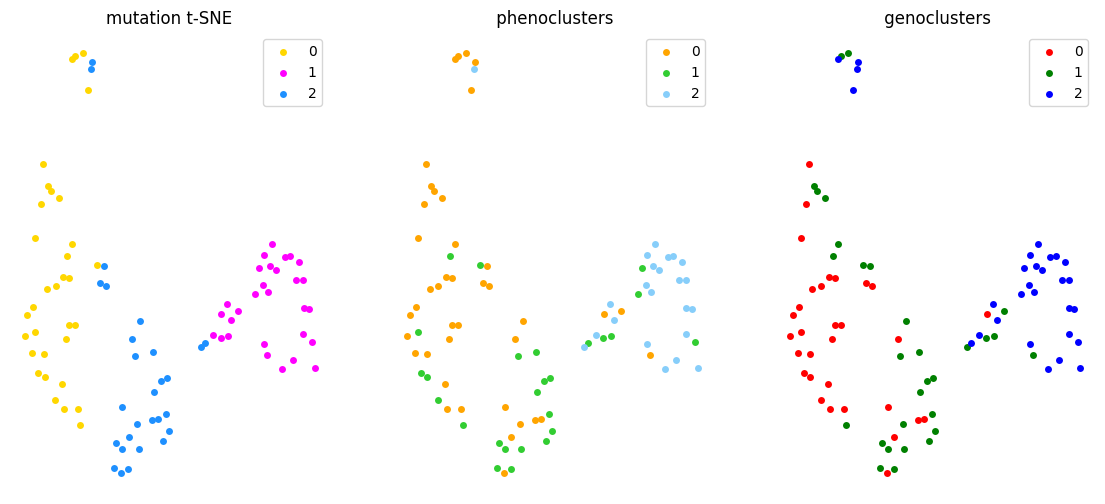

In [257]:
plt.rcParams["figure.figsize"] = [14,6]
plt.rcParams["figure.autolayout"] = False


plt.subplot(1,3,1)
unique, counts = np.unique(cluster_asgn_mn, return_counts=True)
print('unique',str(unique))
#colo_muta=['gold','magenta','dodgerblue']
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(100,figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_muta[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_mn==(i), 0], X_2d_mn[ cluster_asgn_mn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title('mutation t-SNE')
#plt.show()

plt.subplot(1,3,2)
unique, counts = np.unique(cluster_asgn_pn, return_counts=True)
print('unique',str(unique))
#colo_muta=['gold','magenta','dodgerblue']
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(200,figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_pheno[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_pn==(i), 0], X_2d_mn[ cluster_asgn_pn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title(' phenoclusters')
#plt.show()


plt.subplot(1,3,3)
unique, counts = np.unique(cluster_asgn_gn, return_counts=True)
print('unique',str(unique))
#colo_geno=['gold','magenta','dodgerblue']
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_geno[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_gn==(i), 0], X_2d_mn[ cluster_asgn_gn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title(' genoclusters')
#plt.show()


file_name = os.path.join(data_path_output + '/figures/'+'cluster_muta_comp.png')
plt.savefig(file_name,dpi=150)

unique [0 1]
0
[10 11 12 13 14 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 55 56 57 58 59 60 61 62 63 64 80 81 82 83 84]
1
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 45 46 47 48 49 50 51 52 53
 54 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 85 86 87 88 89]
unique [1 2 3 4 5 6 7 8 9]
1
0
[35 36 37 38 39 75 76 77 78 79]
2
1
[80 81 82 83 84 85 86 87 88 89]
3
2
[45 46 47 48 49 60 61 62 63 64]
4
3
[30 31 32 33 34 70 71 72 73 74]
5
4
[ 5  6  7  8  9 55 56 57 58 59]
6
5
[20 21 22 23 24 65 66 67 68 69]
7
6
[ 0  1  2  3  4 40 41 42 43 44]
8
7
[10 11 12 13 14 15 16 17 18 19]
9
8
[25 26 27 28 29 50 51 52 53 54]


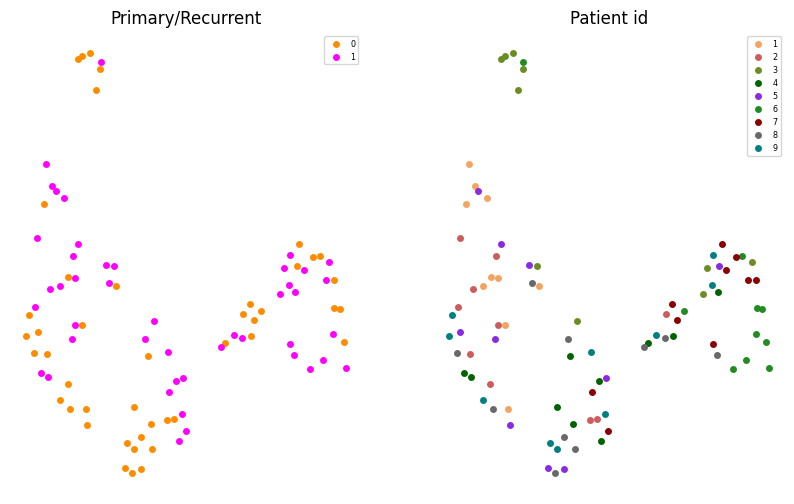

In [258]:
plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = False


plt.subplot(1,2,1)
unique, counts = np.unique(np.array(response_id_list)  , return_counts=True)
print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    s=np.array(np.where(np.array(response_id_list) ==i)).flatten()
    print(s)
    plt.scatter(X_2d_mn[ s, 0],X_2d_mn[ s, 1], color=colours_33[i+12],label=label,s=25,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('Primary/Recurrent')

pat_id_list_int=[]
for j in range(len(pat_id_list)):
    pat_id_list_int.append(int(pat_id_list[j]))
                           
                           
plt.subplot(1,2,2)
unique, counts = np.unique(np.array(pat_id_list_int) , return_counts=True)

print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    print(i)
    s=np.array(np.where(np.array(pat_id_list_int)==label)).flatten()
    print(s)
    plt.scatter(X_2d_mn[ s, 0],X_2d_mn[ s, 1], color=colours_33[i+22],label=label,s=25,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('Patient id')

file_name = os.path.join(data_path_output + '/figures/'+'cluster_muta_comp.png')
#plt.savefig(file_name,dpi=150)


##### cluster comparisons: genotype versus mutation and phenotype

unique [0 1 2]
unique [0 1 2]
unique [0 1 2]


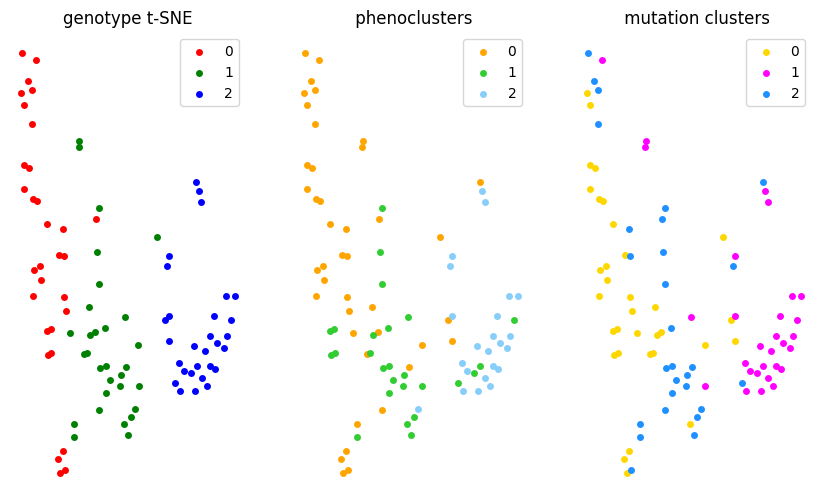

In [259]:
plt.rcParams["figure.figsize"] = [14,6]
plt.rcParams["figure.autolayout"] = False


plt.subplot(1,4,1)
unique, counts = np.unique(cluster_asgn_gn, return_counts=True)
print('unique',str(unique))
#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    c=colo_geno[i] #cm.colors[i]
    plt.scatter(X_2d_gn[ cluster_asgn_gn==(i), 0], X_2d_gn[ cluster_asgn_gn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title('genotype t-SNE')

plt.subplot(1,4,2)
unique, counts = np.unique(cluster_asgn_pn, return_counts=True)
print('unique',str(unique))
#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    c=colo_pheno[i] #cm.colors[i]
    plt.scatter(X_2d_gn[ cluster_asgn_pn==(i), 0], X_2d_gn[ cluster_asgn_pn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title(' phenoclusters')
#plt.show()


plt.subplot(1,4,3)
unique, counts = np.unique(cluster_asgn_mn, return_counts=True)
print('unique',str(unique))
#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_muta[i] #cm.colors[i]
    plt.scatter(X_2d_gn[ cluster_asgn_mn==(i), 0], X_2d_gn[ cluster_asgn_mn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title(' mutation clusters')


'''
plt.subplot(1,4,4)
unique, counts = np.unique(image_ids , return_counts=True)
print('unique',str(unique))
#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    print(label)
    s=np.array(np.where(image_ids==i)).flatten()
    print(s)
    plt.scatter(X_2d_gn[ s, 0],X_2d_gn[ s, 1], color=colours_33[i],label=label,s=15,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('image ids')
'''
file_name = os.path.join(data_path_output + '/figures/'+'cluster_geno_comp.png')
plt.savefig(file_name,dpi=150)

unique [0 1]
0
[10 11 12 13 14 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 55 56 57 58 59 60 61 62 63 64 80 81 82 83 84]
1
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 45 46 47 48 49 50 51 52 53
 54 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 85 86 87 88 89]
unique [1 2 3 4 5 6 7 8 9]
1
0
[35 36 37 38 39 75 76 77 78 79]
2
1
[80 81 82 83 84 85 86 87 88 89]
3
2
[45 46 47 48 49 60 61 62 63 64]
4
3
[30 31 32 33 34 70 71 72 73 74]
5
4
[ 5  6  7  8  9 55 56 57 58 59]
6
5
[20 21 22 23 24 65 66 67 68 69]
7
6
[ 0  1  2  3  4 40 41 42 43 44]
8
7
[10 11 12 13 14 15 16 17 18 19]
9
8
[25 26 27 28 29 50 51 52 53 54]


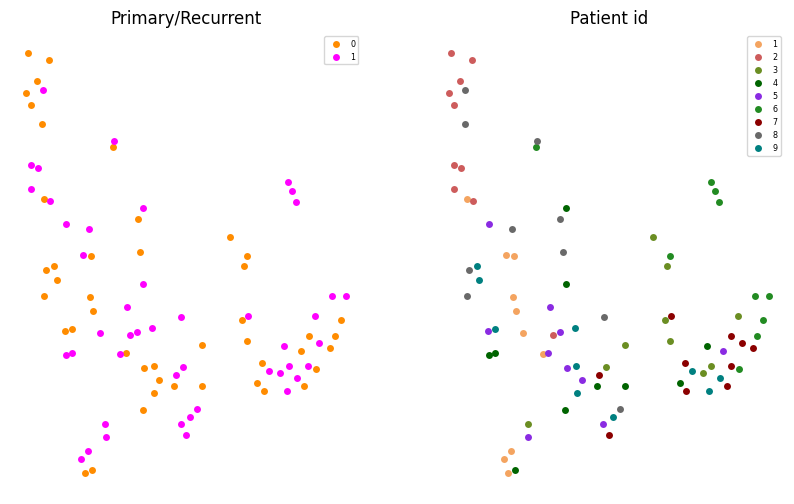

In [260]:
plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = False


plt.subplot(1,2,1)
unique, counts = np.unique(np.array(response_id_list)  , return_counts=True)
print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    s=np.array(np.where(np.array(response_id_list) ==i)).flatten()
    print(s)
    plt.scatter(X_2d_gn[ s, 0],X_2d_gn[ s, 1], color=colours_33[i+12],label=label,s=25,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('Primary/Recurrent')

pat_id_list_int=[]
for j in range(len(pat_id_list)):
    pat_id_list_int.append(int(pat_id_list[j]))
                           
                           
plt.subplot(1,2,2)
unique, counts = np.unique(np.array(pat_id_list_int) , return_counts=True)

print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    print(i)
    s=np.array(np.where(np.array(pat_id_list_int)==label)).flatten()
    print(s)
    plt.scatter(X_2d_gn[ s, 0],X_2d_gn[ s, 1], color=colours_33[i+22],label=label,s=25,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('Patient id')

file_name = os.path.join(data_path_output + '/figures/'+'cluster_muta_comp.png')
#plt.savefig(file_name,dpi=150)


##### cluster comparisons: phenotype versus mutation and genotype

unique [0 1 2]
unique [0 1 2]
unique [0 1 2]


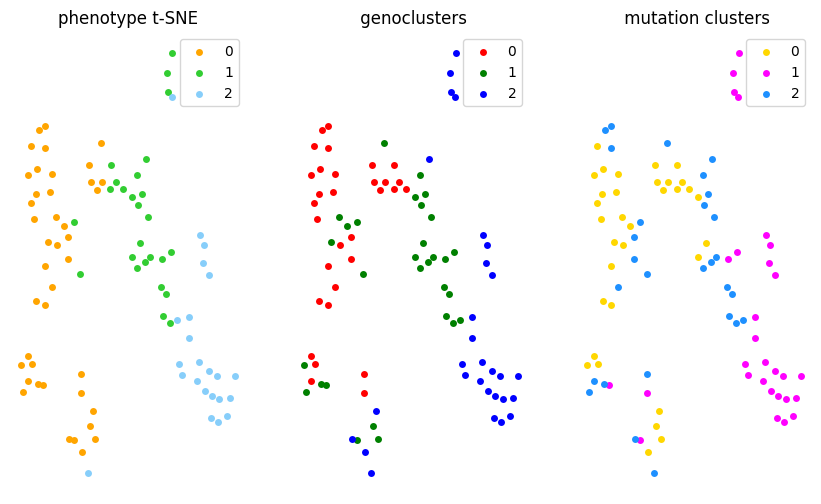

In [261]:
plt.rcParams["figure.figsize"] = [14,6]
plt.rcParams["figure.autolayout"] = False


plt.subplot(1,4,1)
unique, counts = np.unique(cluster_asgn_pn, return_counts=True)
print('unique',str(unique))

#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    c=colo_pheno[i] #cm.colors[i]
    plt.scatter(X_2d_pn[ cluster_asgn_pn==(i), 0], X_2d_pn[ cluster_asgn_pn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title('phenotype t-SNE')


plt.subplot(1,4,2)
unique, counts = np.unique(cluster_asgn_gn, return_counts=True)
print('unique',str(unique))
#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    c=colo_geno[i] #cm.colors[i]
    plt.scatter(X_2d_pn[ cluster_asgn_gn==(i), 0], X_2d_pn[ cluster_asgn_gn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title(' genoclusters')



plt.subplot(1,4,3)
unique, counts = np.unique(cluster_asgn_mn, return_counts=True)
print('unique',str(unique))
#t-SNE plots
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    c=colo_muta[i] #cm.colors[i]
    plt.scatter(X_2d_pn[ cluster_asgn_mn==(i), 0], X_2d_pn[ cluster_asgn_mn==(i), 1], color=c,label=label,s=25,linewidths=0)
plt.legend()
plt.title(' mutation clusters')

'''

plt.subplot(1,4,4)
unique, counts = np.unique(image_ids , return_counts=True)
print('unique',str(unique))
target_ids = range(len(unique))
plt.axis('off')
for i,  label in zip(target_ids,  unique):
    print(label)
    s=np.array(np.where(image_ids==i)).flatten()
    print(s)
    plt.scatter(X_2d_pn[ s, 0],X_2d_pn[ s, 1], color=colours_33[i],label=label,s=15,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('image ids')
'''

file_name = os.path.join(data_path_output + '/figures/'+'cluster_pheno_comp.png')
#plt.savefig(file_name,dpi=150)

unique [0 1]
0
[10 11 12 13 14 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 55 56 57 58 59 60 61 62 63 64 80 81 82 83 84]
1
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 45 46 47 48 49 50 51 52 53
 54 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 85 86 87 88 89]
unique [1 2 3 4 5 6 7 8 9]
1
0
[35 36 37 38 39 75 76 77 78 79]
2
1
[80 81 82 83 84 85 86 87 88 89]
3
2
[45 46 47 48 49 60 61 62 63 64]
4
3
[30 31 32 33 34 70 71 72 73 74]
5
4
[ 5  6  7  8  9 55 56 57 58 59]
6
5
[20 21 22 23 24 65 66 67 68 69]
7
6
[ 0  1  2  3  4 40 41 42 43 44]
8
7
[10 11 12 13 14 15 16 17 18 19]
9
8
[25 26 27 28 29 50 51 52 53 54]


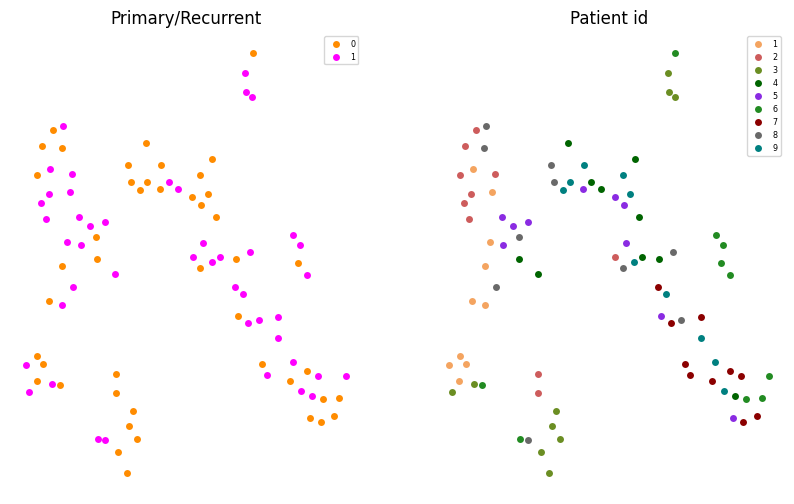

In [262]:
plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = False


plt.subplot(1,2,1)
unique, counts = np.unique(np.array(response_id_list)  , return_counts=True)
print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    s=np.array(np.where(np.array(response_id_list) ==i)).flatten()
    print(s)
    plt.scatter(X_2d_pn[ s, 0],X_2d_pn[ s, 1], color=colours_33[i+12],label=label,s=25,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('Primary/Recurrent')

pat_id_list_int=[]
for j in range(len(pat_id_list)):
    pat_id_list_int.append(int(pat_id_list[j]))
                           
                           
plt.subplot(1,2,2)
unique, counts = np.unique(np.array(pat_id_list_int) , return_counts=True)

print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    print(i)
    s=np.array(np.where(np.array(pat_id_list_int)==label)).flatten()
    print(s)
    plt.scatter(X_2d_pn[ s, 0],X_2d_pn[ s, 1], color=colours_33[i+22],label=label,s=25,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('Patient id')

file_name = os.path.join(data_path_output + '/figures/'+'cluster_muta_comp.png')
#plt.savefig(file_name,dpi=150)
